In [36]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import pandas as pd
from tqdm import tqdm

jtplot.style('chesterish')

In [550]:
lookup = pd.read_csv('./data/test.csv')
trans_raw = pd.read_csv('./data/sales_train.csv') #transactions
shops = pd.read_csv('./data/shops.csv')
items = pd.read_csv('./data/items.csv')
categories = pd.read_csv('./data/item_categories.csv')

In [551]:
"""
CURRENT ISSUES:
1. Difficulty in handling NULL values
"""

'\nCURRENT ISSUES:\n1. Difficulty in handling NULL values\n'

### Pull and Format Data

#### Open raw data

In [196]:
print(len(lookup))
lookup.head(10)

214200


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [197]:
print('Size of trans: ' + str(trans.shape))
trans_raw.head(10)

Size of trans: (666172, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [198]:
print(len(shops))
shops.head(10)

60


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [199]:
print(len(items))
items.head(10)

22170


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [200]:
categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


#### Pre-formatting the data

In [552]:
#MERGE LOOKUP CATEGORIES WITH MAIN DATASET
trans_raw  = pd.merge(trans_raw , lookup, on=['shop_id', 'item_id'], how='right')
trans_raw.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID
0,02.01.2013,0.0,59,22154,999.0,1.0,150983
1,03.01.2013,0.0,25,2574,399.0,2.0,56520
2,05.01.2013,0.0,25,2574,399.0,1.0,56520
3,07.01.2013,0.0,25,2574,399.0,1.0,56520
4,08.01.2013,0.0,25,2574,399.0,2.0,56520
5,10.01.2013,0.0,25,2574,399.0,1.0,56520
6,11.01.2013,0.0,25,2574,399.0,2.0,56520
7,13.01.2013,0.0,25,2574,399.0,1.0,56520
8,16.01.2013,0.0,25,2574,399.0,1.0,56520
9,26.01.2013,0.0,25,2574,399.0,1.0,56520


In [553]:
#Add Item categories as trainable features
trans_raw  = pd.merge(trans_raw , items.drop(['item_name'], axis=1), on=['item_id'], how='left')
trans_raw

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
0,02.01.2013,0.0,59,22154,999.0,1.0,150983,37
1,03.01.2013,0.0,25,2574,399.0,2.0,56520,55
2,05.01.2013,0.0,25,2574,399.0,1.0,56520,55
3,07.01.2013,0.0,25,2574,399.0,1.0,56520,55
4,08.01.2013,0.0,25,2574,399.0,2.0,56520,55
...,...,...,...,...,...,...,...,...
1327230,NaN,NaN,45,9500,NaN,NaN,214188,40
1327231,NaN,NaN,45,16007,NaN,NaN,214189,64
1327232,NaN,NaN,45,18027,NaN,NaN,214194,70
1327233,NaN,NaN,45,16188,NaN,NaN,214196,64


In [554]:
#Drop shop_id since ID already maps the values represented by this. (redundant data)
#item_id will be preserved for now to study item_price relationships
#Drop date. Use date_block_num to categorize the months when we combine the items per month.
trans_raw  = trans_raw.drop(columns=['date', 'shop_id'])

In [555]:
trans_raw  = trans_raw.reindex(columns=['ID', 'date_block_num', 'item_id', 'item_price', 'item_category_id','item_cnt_day'])
print('Size of trans: ' + str(trans_raw.shape))
trans_raw.head(10)

Size of trans: (1327235, 6)


,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_day
0,150983,0.0,22154,999.0,37,1.0
1,56520,0.0,2574,399.0,55,2.0
2,56520,0.0,2574,399.0,55,1.0
3,56520,0.0,2574,399.0,55,1.0
4,56520,0.0,2574,399.0,55,2.0
5,56520,0.0,2574,399.0,55,1.0
6,56520,0.0,2574,399.0,55,2.0
7,56520,0.0,2574,399.0,55,1.0
8,56520,0.0,2574,399.0,55,1.0
9,56520,0.0,2574,399.0,55,1.0


In [556]:
#Group by ID, adding all the items sold per month per shop-item pair
trans = trans_raw.groupby(['ID', 'date_block_num', 'item_id', 'item_price', 'item_category_id'], as_index = False)['item_cnt_day'].sum()
trans = trans.rename(columns={'item_cnt_day':'item_cnt_mon'})
trans

,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_mon
0,0,20.0,5037,2599.0,19,1.0
1,0,22.0,5037,2599.0,19,1.0
2,0,23.0,5037,1999.0,19,2.0
3,0,24.0,5037,1999.0,19,2.0
4,0,28.0,5037,1299.0,19,1.0
...,...,...,...,...,...,...
666167,214197,24.0,15757,199.0,55,1.0
666168,214197,25.0,15757,199.0,55,1.0
666169,214199,17.0,969,549.0,37,3.0
666170,214199,18.0,969,549.0,37,1.0


In [557]:
#Check if grouping didn't mess up the data by accidentally adding units that weren't meant to be added
ID = 214199
date_block_num = 17
trans_raw[(trans_raw['ID'] == ID) & (trans_raw['date_block_num'] == date_block_num)]

,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_day
846088,214199,17.0,969,549.0,37,1.0
846089,214199,17.0,969,549.0,37,2.0


In [558]:
#Check if all IDs are still present in the newly grouped trans
trans_raw[(trans_raw['ID'] == 1)]

,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_day
1224439,1,NaN,5320,NaN,55,NaN


In [559]:
#Check if all IDs are still present in the newly grouped trans
trans[(trans['ID'] == 1)]

,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_mon


### EDA and Pre-processing

#### NaNs

**Observations**
* By grouping trans_raw by ID into trans, all of the entries where NaNs were present was automatically removed (we dont want this)
* However, we want to preserve the NaN cases because this represents item-shop pairs that are still present in the test set
* Plan of action:
  * insert -999 on NaNs under date_block_num
  * generate boolean feature column 'is_sold' to identify shop-item pairs that were sold in training period
  * assign item price based on item represented by ID

**Initial Hypothesis**
* Certain shop-item pair categorized by ID never showed up in the training data. This could mean that:
  * That particular shop does not offer that particular item
  * That item is yet to be sold by that particular shop
  
 _Yet, the test data asks us to still predict how much items each item-shop pair (even those who doesn't exist in the training set) will sell on the 34th month._

In [560]:
#Percentage of NaNs in original data
print('Number of NaNs: ' + str(trans_raw.groupby('ID')['date_block_num'].mean().isna().sum()))
print('% of NaNs: ' + str(np.around(trans_raw.groupby('ID')['date_block_num'].mean().isna().sum()/len(lookup), decimals=2) * 100) + '%')

Number of NaNs: 102796
% of NaNs: 48.0%


In [561]:
trans_raw.isna().sum()

ID                       0
date_block_num      102796
item_id                  0
item_price          102796
item_category_id         0
item_cnt_day        102796
dtype: int64

In [562]:
### Deal with NaNs: date_block_num
#replace with a significant negative number to signal that this shop-item pair wasn't sold during training period
trans_raw['date_block_num'].fillna(-15, inplace=True)
trans_raw

,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_day
0,150983,0.0,22154,999.0,37,1.0
1,56520,0.0,2574,399.0,55,2.0
2,56520,0.0,2574,399.0,55,1.0
3,56520,0.0,2574,399.0,55,1.0
4,56520,0.0,2574,399.0,55,2.0
...,...,...,...,...,...,...
1327230,214188,-15.0,9500,NaN,40,NaN
1327231,214189,-15.0,16007,NaN,64,NaN
1327232,214194,-15.0,18027,NaN,70,NaN
1327233,214196,-15.0,16188,NaN,64,NaN


In [563]:
### Dealing with NaNs: item_price
#PRICE ANALYSIS: do shops change the price of certain items across months?
trans_raw.groupby('item_id')['item_price'].unique()

item_id
30       [399.0, 385.66666666699996, 169.0, 387.5714285...
31       [699.0, 629.0, 499.0, 405.72, 249.0, 199.0, 36...
32       [349.0, 149.0, 348.838571429, 278.4, 148.7, 33...
33       [499.0, 199.0, 159.2, 159.0, 399.0, 137.0, 133...
38           [2399.0, 2299.0, 2249.0, 1586.0, 1799.0, nan]
                               ...                        
22162    [28.0, 399.0, 349.0, 359.0, 379.0, 379.05, 270...
22163                            [169.0, 98.0, 90.23, nan]
22164    [711.5, 749.0, 549.0, 699.0, 724.0, 674.0, 711...
22166                                         [150.0, nan]
22167    [299.0, 287.0, 239.2, 268.9, 269.1, 254.15, 15...
Name: item_price, Length: 5100, dtype: object

In [564]:
### Dealing with NaNs: item_price
#Generate price look up table using mean averaging
lookup_price = trans_raw.groupby('item_id')['item_price'].mean()
lookup_price

item_id
30        324.562531
31        573.793088
32        250.083706
33        249.273016
38       2351.537037
            ...     
22162     384.521575
22163     165.735143
22164     713.923241
22166     150.000000
22167     297.764196
Name: item_price, Length: 5100, dtype: float64

In [565]:
### Dealing with NaNs: item_price
#Fill NaNs using values from price lookup table
trans_raw['item_price'] = trans_raw.set_index('item_id', drop=True).rename_axis(None)['item_price'].fillna(lookup_price).reset_index(drop=True)
trans_raw

,ID,date_block_num,item_id,item_price,item_category_id,item_cnt_day
0,150983,0.0,22154,999.000000,37,1.0
1,56520,0.0,2574,399.000000,55,2.0
2,56520,0.0,2574,399.000000,55,1.0
3,56520,0.0,2574,399.000000,55,1.0
4,56520,0.0,2574,399.000000,55,2.0
...,...,...,...,...,...,...
1327230,214188,-15.0,9500,98.482143,40,NaN
1327231,214189,-15.0,16007,2799.000000,64,NaN
1327232,214194,-15.0,18027,296.916667,70,NaN
1327233,214196,-15.0,16188,1256.975000,64,NaN


In [566]:
### Dealing with NaNs: generate feature = 'was_sold'
trans_raw['was_sold'] = trans_raw['item_cnt_day'].notna().astype(int)
trans_raw  = trans_raw.reindex(columns=['ID', 'date_block_num', 'item_id', 'item_price', 'item_category_id','was_sold','item_cnt_day'])
trans_raw

,ID,date_block_num,item_id,item_price,item_category_id,was_sold,item_cnt_day
0,150983,0.0,22154,999.000000,37,1,1.0
1,56520,0.0,2574,399.000000,55,1,2.0
2,56520,0.0,2574,399.000000,55,1,1.0
3,56520,0.0,2574,399.000000,55,1,1.0
4,56520,0.0,2574,399.000000,55,1,2.0
...,...,...,...,...,...,...,...
1327230,214188,-15.0,9500,98.482143,40,0,NaN
1327231,214189,-15.0,16007,2799.000000,64,0,NaN
1327232,214194,-15.0,18027,296.916667,70,0,NaN
1327233,214196,-15.0,16188,1256.975000,64,0,NaN


In [567]:
### Dealing with NaNs: item_cnt_day
#Fill with zeros items that weren't sold
trans_raw['item_cnt_day'].fillna(0, inplace=True)
trans_raw

,ID,date_block_num,item_id,item_price,item_category_id,was_sold,item_cnt_day
0,150983,0.0,22154,999.000000,37,1,1.0
1,56520,0.0,2574,399.000000,55,1,2.0
2,56520,0.0,2574,399.000000,55,1,1.0
3,56520,0.0,2574,399.000000,55,1,1.0
4,56520,0.0,2574,399.000000,55,1,2.0
...,...,...,...,...,...,...,...
1327230,214188,-15.0,9500,98.482143,40,0,0.0
1327231,214189,-15.0,16007,2799.000000,64,0,0.0
1327232,214194,-15.0,18027,296.916667,70,0,0.0
1327233,214196,-15.0,16188,1256.975000,64,0,0.0


In [568]:
#Check for NaNs
trans_raw.isna().sum()

ID                      0
date_block_num          0
item_id                 0
item_price          16128
item_category_id        0
was_sold                0
item_cnt_day            0
dtype: int64

In [569]:
trans_raw[(trans_raw['item_id'] == 5320)].head(10)

,ID,date_block_num,item_id,item_price,item_category_id,was_sold,item_cnt_day
1224439,1,-15.0,5320,NaN,55,0,0.0
1226940,5101,-15.0,5320,NaN,55,0,0.0
1229566,10201,-15.0,5320,NaN,55,0,0.0
1231204,15301,-15.0,5320,NaN,55,0,0.0
1234185,20401,-15.0,5320,NaN,55,0,0.0
1237372,25501,-15.0,5320,NaN,55,0,0.0
1239770,30601,-15.0,5320,NaN,55,0,0.0
1242750,35701,-15.0,5320,NaN,55,0,0.0
1245233,40801,-15.0,5320,NaN,55,0,0.0
1246713,45901,-15.0,5320,NaN,55,0,0.0


Apparently, there are still 16,128 items that were never sold at all by any shop across the entire training period!

In [570]:
### Dealing with NaNs: item_price special case
#Check if there is a correlation among the prices of items within the same category
trans_raw.groupby('item_category_id')['item_price'].unique()[55][:10]

#Plan: assign remaining NaNs with the mean of all the prices of items within that same category

array([399.  , 398.95, 398.7 , 449.  , 279.  , 299.  , 499.  , 298.7 ,
       349.  , 348.5 ])

In [571]:
#Generate lookup_table for the mean prices of items of similar category
#Check if there are still NaNs remaining
lookup_price_mean = trans_raw.groupby('item_category_id')['item_price'].mean()
print('NaNs left: %i' % lookup_price_mean.isna().sum())
lookup_price_mean

NaNs left: 2


item_category_id
0             NaN
2     2199.581232
3     2572.234539
5      617.163759
6     1985.357603
         ...     
76    1655.673741
77     218.227699
78     293.820356
79    1095.233258
83     103.279710
Name: item_price, Length: 62, dtype: float64

In [572]:
#For now, i'll do a quick back fill to fill up the 2 remaining NaNs here
lookup_price_mean.fillna(method='bfill')

item_category_id
0     2199.581232
2     2199.581232
3     2572.234539
5      617.163759
6     1985.357603
         ...     
76    1655.673741
77     218.227699
78     293.820356
79    1095.233258
83     103.279710
Name: item_price, Length: 62, dtype: float64

In [573]:
###### Dealing with NaNs: item_price special case
#Fill NaNs using values from price lookup table of mean price values based on item category
trans_raw['item_price'] = trans_raw.set_index('item_category_id', drop=True).rename_axis(None)['item_price'].fillna(lookup_price_mean).reset_index(drop=True)

#Stubborn items -- temporary fix: apply a contant within plausible range
trans_raw['item_price'].fillna(699, inplace=True)

In [574]:
#Check for NaNs
trans_raw.isna().sum()

ID                  0
date_block_num      0
item_id             0
item_price          0
item_category_id    0
was_sold            0
item_cnt_day        0
dtype: int64

**Summary of NaN Pre-processing Done**
1. date_block_num: assigned with -15 to signal that the shop-item pair wasn't present in the training period
  * -15 was chosen since the max value of date_block_num is 33 (just to balance out the distribution)
2. item_price: assigned as the mean price of that particular item was taken across _all shops_ across _the entire training period_
3. was_sold: boolean indicator generated to identify which item-shop pair didn't exist in the training period
4. item_cnt_day: assigned 0 to indicinate absence of sale

#### Outliers

In [575]:
#GROUP DATA, SUM ALL ITEMS PER MONTH
trans = trans_raw.groupby(['ID', 'date_block_num', 'item_id', 'item_price', 'item_category_id', 'was_sold'], as_index = False)['item_cnt_day'].sum()
trans = trans.rename(columns={'item_cnt_day':'item_cnt_mon'})

#We can drop item_id now since it's a redundant feature with ID
trans.drop(columns=['item_id'], inplace=True)

print('Size of trans: ' + str(trans.shape))
trans.head(10)

Size of trans: (768968, 6)


,ID,date_block_num,item_price,item_category_id,was_sold,item_cnt_mon
0,0,20.0,2599.0,19,1,1.0
1,0,22.0,2599.0,19,1,1.0
2,0,23.0,1999.0,19,1,2.0
3,0,24.0,1999.0,19,1,2.0
4,0,28.0,1299.0,19,1,1.0
5,0,29.0,1499.0,19,1,1.0
6,0,30.0,1499.0,19,1,1.0
7,0,31.0,749.0,19,1,1.0
8,0,31.0,749.5,19,1,1.0
9,0,31.0,1499.0,19,1,1.0


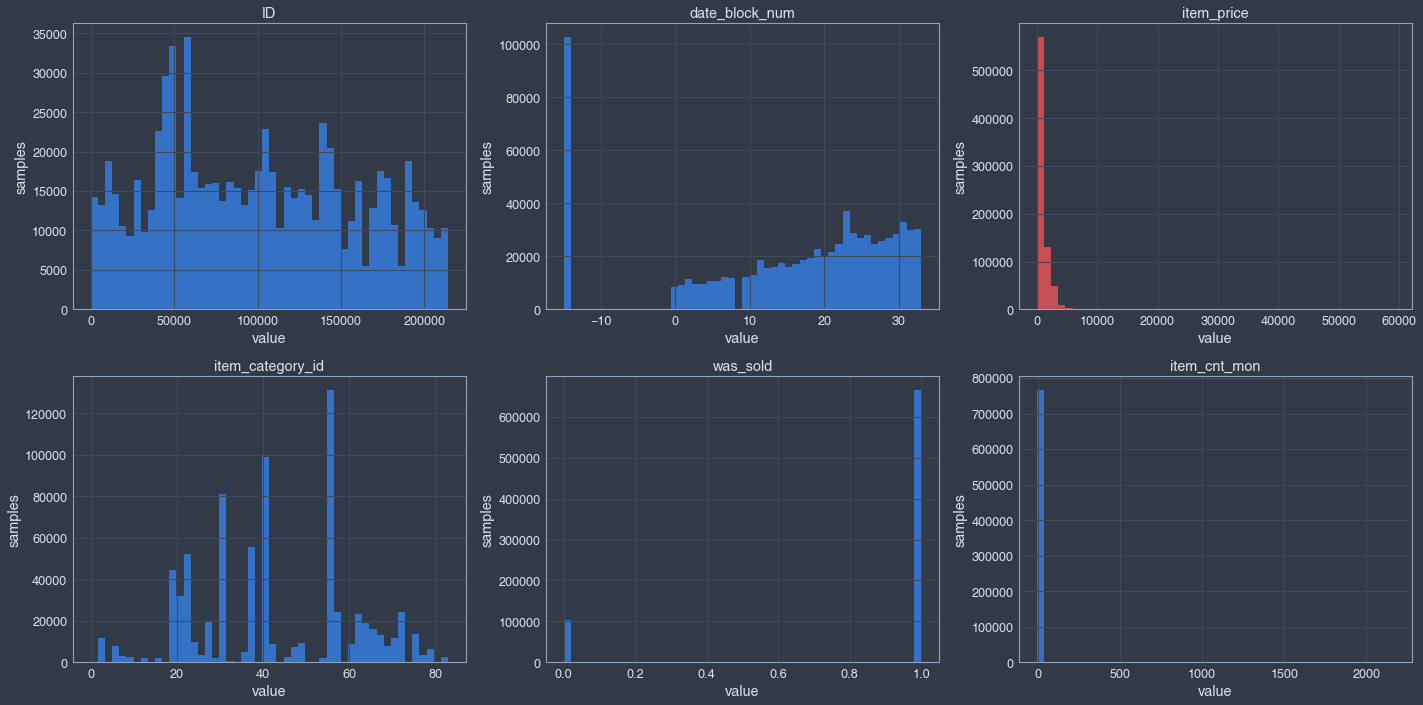

In [576]:
#Check for outliers
plot_labels = ['ID', 'date_block_num', 'item_price', 'item_category_id', 'was_sold', 'item_cnt_mon']

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(20,10))

for i in range(rows):
    for j in range(cols):
        
        if i == 0 and j == 2:
            color = 'r'
        else:
            color = 'b'
        
        _ = ax[i,j].hist(trans[plot_labels[i * (rows + 1) + j]],bins=50, color=color)
        ax[i,j].set_title(plot_labels[i * (rows + 1) + j])
        ax[i,j].set_xlabel('value')
        ax[i,j].set_ylabel('samples')
                               
plt.tight_layout()

* Item_price distribution seems off. I'll plot the scatter to investigate

In [577]:
trans.describe()

,ID,date_block_num,item_price,item_category_id,was_sold,item_cnt_mon
count,768968.000000,768968.000000,768968.000000,768968.000000,768968.000000,768968.000000
mean,99987.911181,15.453937,996.047585,42.516850,0.866320,2.103821
std,58835.557870,14.663710,1855.493703,18.182547,0.340309,9.323665
min,0.000000,-15.000000,0.500000,0.000000,0.000000,-5.000000
25%,49395.000000,8.000000,299.000000,29.000000,1.000000,1.000000
50%,97190.000000,20.000000,499.000000,40.000000,1.000000,1.000000
75%,146229.000000,27.000000,1199.000000,55.000000,1.000000,2.000000
max,214199.000000,33.000000,59200.000000,83.000000,1.000000,2169.000000


Text(0.5, 0, 'row_index')

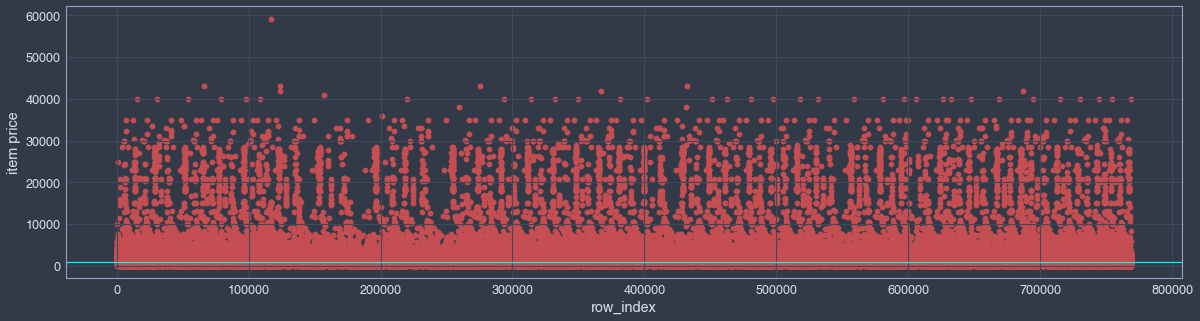

In [578]:
plt.figure(figsize=(20,5))
plt.scatter(trans.index, trans['item_price'], c='r')
plt.axhline(y=trans.item_price.mean(), color='cyan', linestyle='-')
plt.ylabel('item price')
plt.xlabel('row_index')

Text(0, 0.5, 'item price')

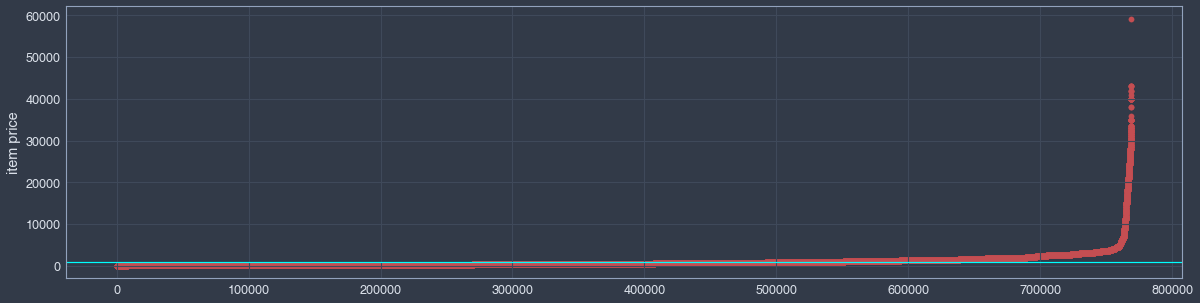

In [579]:
#Sort values to properly see data distribution
plt.figure(figsize=(20,5))
plt.scatter(trans.index, np.sort(trans['item_price']), c='r')
plt.axhline(y=trans.item_price.mean(), color='cyan', linestyle='-')
plt.ylabel('item price')

* There are so much samples with item_price greater than 5000. This messes up our mean-std values.
* I'll apply rank transform to replace the values with their particular 'rank' or position in the ordered set

Text(0, 0.5, 'number of samples')

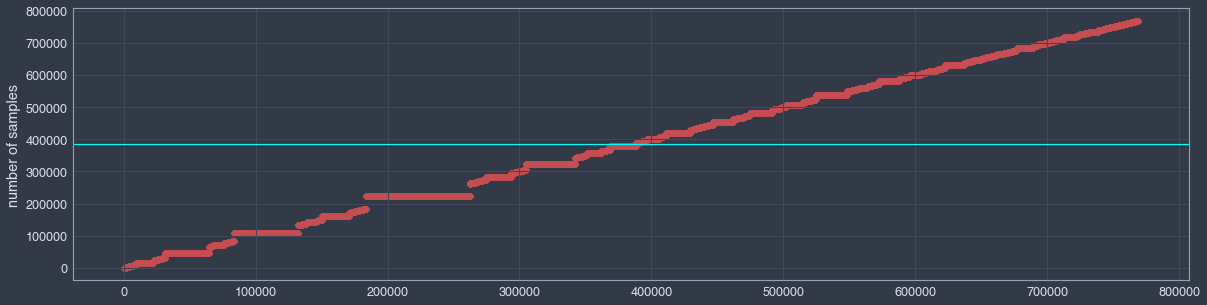

In [580]:
#METHOD: Apply Rank transformation
from scipy.stats import rankdata
plt.figure(figsize=(20,5))
plt.scatter(trans.index, np.sort(rankdata(trans['item_price'])), c='r')
plt.axhline(y=rankdata(trans.item_price).mean(), color='cyan', linestyle='-')
plt.ylabel('number of samples')

In [581]:
trans['item_price'] = rankdata(trans['item_price'])
trans.describe()

,ID,date_block_num,item_price,item_category_id,was_sold,item_cnt_mon
count,768968.000000,768968.000000,768968.000000,768968.000000,768968.000000,768968.000000
mean,99987.911181,15.453937,384484.500000,42.516850,0.866320,2.103821
std,58835.557870,14.663710,221797.040996,18.182547,0.340309,9.323665
min,0.000000,-15.000000,128.500000,0.000000,0.000000,-5.000000
25%,49395.000000,8.000000,223092.500000,29.000000,1.000000,1.000000
50%,97190.000000,20.000000,378697.000000,40.000000,1.000000,1.000000
75%,146229.000000,27.000000,580193.500000,55.000000,1.000000,2.000000
max,214199.000000,33.000000,768968.000000,83.000000,1.000000,2169.000000


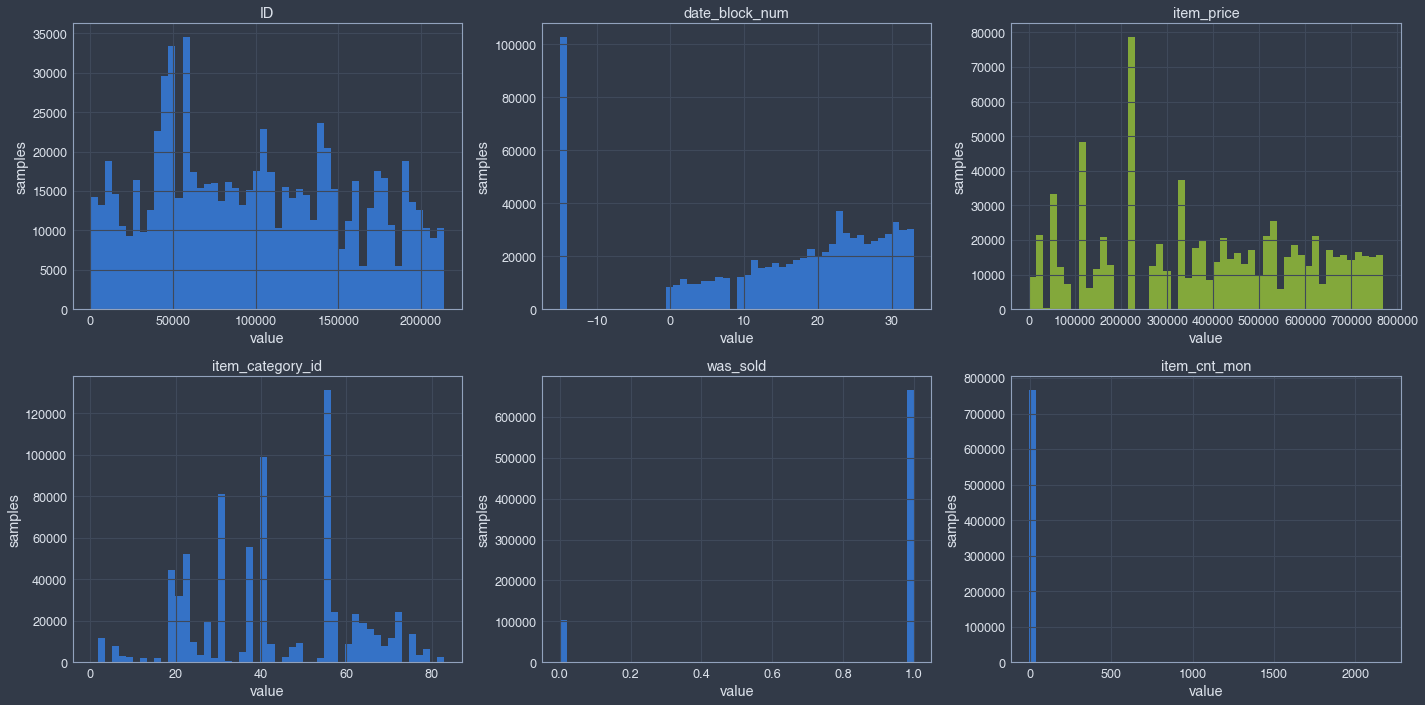

In [582]:
#Check for outliers
plot_labels = ['ID', 'date_block_num', 'item_price', 'item_category_id', 'was_sold', 'item_cnt_mon']

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(20,10))

for i in range(rows):
    for j in range(cols):
        
        if i == 0 and j == 2:
            color = 'g'
        else:
            color = 'b'
        
        _ = ax[i,j].hist(trans[plot_labels[i * (rows + 1) + j]],bins=50, color=color)
        ax[i,j].set_title(plot_labels[i * (rows + 1) + j])
        ax[i,j].set_xlabel('value')
        ax[i,j].set_ylabel('samples')
                               
plt.tight_layout()

**Summary**
* We have an outlier in the item_price column
  * still, we cant just clip these items off because they contain info about a few expensive products
  * idea, use transform to bring the values closer --> used rank transform
* Some items sell much much better than the rest as seen with the item_cnt_mon distribution

In [583]:
#Winsorization (to clip outliers)
#LOWERBOUND, UPPERBOUND = np.percentile(data_0['item_price'], [1, 99])
#clip = np.clip(data['item_price'], LOWERBOUND, UPPERBOUND)
#_ = plt.hist(clip , bins=10)
#NOTE: CLIPPING =/= REMOVING DATA POINT

#### Feature Scaling

In [584]:
#Select scaling method:
std_scale = 1
minmax_scale = 0

In [585]:
data = trans.copy()

#Standard Scaler
if std_scale:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data.iloc[:,:-2] = scaler.fit_transform(data.iloc[:,:-2])
    data.head(10)
    
#MinMax Scaler
elif minmax_scale:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data.iloc[:,:-2] = scaler.fit_transform(data.iloc[:,:-2])
    data.head(10)

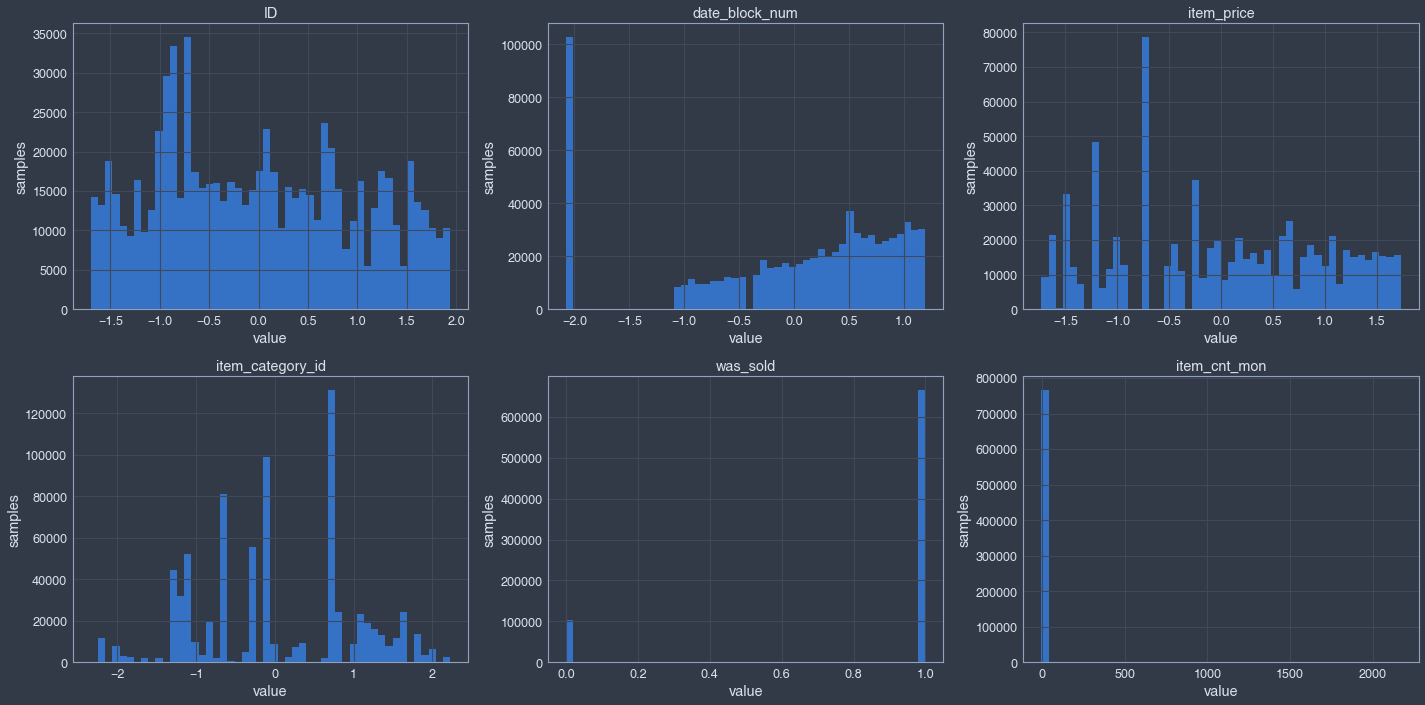

In [586]:
#Check Scaled Distribution
plot_labels = ['ID', 'date_block_num', 'item_price', 'item_category_id', 'was_sold', 'item_cnt_mon']

rows = 2
cols = 3

fig, ax = plt.subplots(rows, cols, figsize=(20,10))

for i in range(rows):
    for j in range(cols):
        _ = ax[i,j].hist(data[plot_labels[i * (rows + 1) + j]],bins=50, color='b')
        ax[i,j].set_title(plot_labels[i * (rows + 1) + j])
        ax[i,j].set_xlabel('value')
        ax[i,j].set_ylabel('samples')
                               
plt.tight_layout()

### Model

In [490]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [613]:
X.head()

,ID,date_block_num,item_price,item_category_id,was_sold
0,-1.699448,0.310022,1.500641,-1.293376,1
1,-1.699448,0.446413,1.500641,-1.293376,1
2,-1.699448,0.514608,1.345350,-1.293376,1
3,-1.699448,0.582804,1.345350,-1.293376,1
4,-1.699448,0.855586,0.969923,-1.293376,1


In [493]:
hidden_layers = (3**2, 3**3, 3**2,)
regr = MLPRegressor(max_iter=100, hidden_layer_sizes = hidden_layers, alpha = 0.001, learning_rate='adaptive', 
                    random_state=1, batch_size = 512, verbose=1).fit(X_train, y_train)

Iteration 1, loss = 45.55899190
Iteration 2, loss = 43.55440606
Iteration 3, loss = 41.67915025
Iteration 4, loss = 38.86535922
Iteration 5, loss = 36.41906868
Iteration 6, loss = 35.05496250
Iteration 7, loss = 34.30778309
Iteration 8, loss = 33.55895150
Iteration 9, loss = 33.49398500
Iteration 10, loss = 33.08384216
Iteration 11, loss = 33.06495758
Iteration 12, loss = 32.92377906
Iteration 13, loss = 32.77101271
Iteration 14, loss = 32.75399472
Iteration 15, loss = 32.70619724
Iteration 16, loss = 32.65405050
Iteration 17, loss = 32.64846088
Iteration 18, loss = 32.45018209
Iteration 19, loss = 32.32689360
Iteration 20, loss = 32.37540755
Iteration 21, loss = 32.36277738
Iteration 22, loss = 32.27193988
Iteration 23, loss = 32.14722468
Iteration 24, loss = 32.63604133
Iteration 25, loss = 32.35890619
Iteration 26, loss = 32.18225937
Iteration 27, loss = 32.35527278
Iteration 28, loss = 32.09704743
Iteration 29, loss = 32.31201481
Iteration 30, loss = 32.17289808
Iteration 31, loss 

D:\Users\Rein\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Loss')

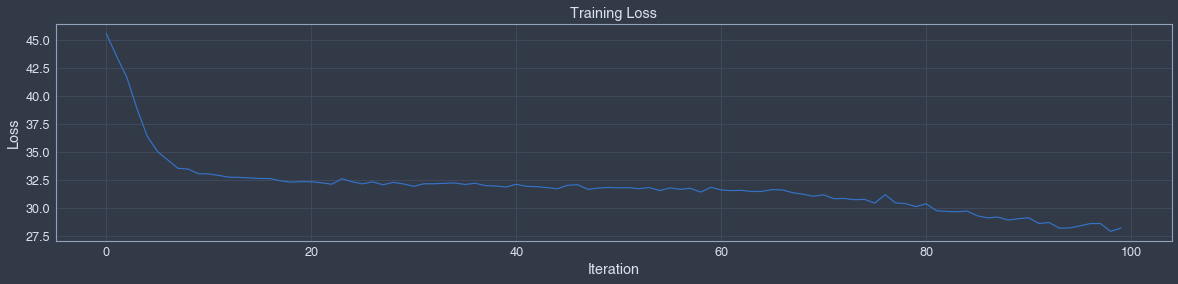

In [494]:
losses = regr.loss_curve_
plt.figure(figsize=(20,4))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [495]:
regr.predict(X_test[:2])

array([1.70366562, 1.7019141 ])

In [496]:
regr.score(X_test, y_test)

0.43779140230516445

### Submit answers to kaggle

In [633]:
#MESSED UP BIG TIME YO!

fmt = pd.read_csv('./fmt.csv')
fmt['ID'] = data.groupby('ID', as_index=False)['item_category_id'].mean()['ID']
fmt['date_block_num'] = 34
fmt.drop(columns=['item_cnt_month'], inplace=True)
fmt['item_price'] = data.groupby('ID', as_index=False)['item_price'].mean()['item_price']
fmt['item_category_id'] = data.groupby('ID', as_index=False)['item_category_id'].mean()['item_category_id']
fmt['was_sold'] = np.random.randint(2)
fmt

,ID,date_block_num,item_price,item_category_id,was_sold
0,-1.699448,34,1.011639,-1.293376,0
1,-1.699431,34,-0.536211,0.686546,0
2,-1.699414,34,0.469549,-1.293376,0
3,-1.699397,34,0.159926,-1.073384,0
4,-1.699380,34,1.531158,-1.238378,0
...,...,...,...,...,...
214195,1.941125,34,-1.329410,0.686546,0
214196,1.941142,34,0.938701,1.181527,0
214197,1.941159,34,-1.246057,0.686546,0
214198,1.941176,34,-1.692251,-0.138421,0


In [618]:
#predict output
submission = pd.read_csv('./submission.csv')
submission['item_cnt_month'] = regr.predict(fmt).astype('int32')
submission.to_csv('submission.csv', index=False)
submission

,ID,item_cnt_month
0,0,10
1,1,-7
2,2,11
3,3,10
4,4,9
...,...,...
214195,214195,13
214196,214196,9
214197,214197,13
214198,214198,9


Text(0, 0.5, 'samples')

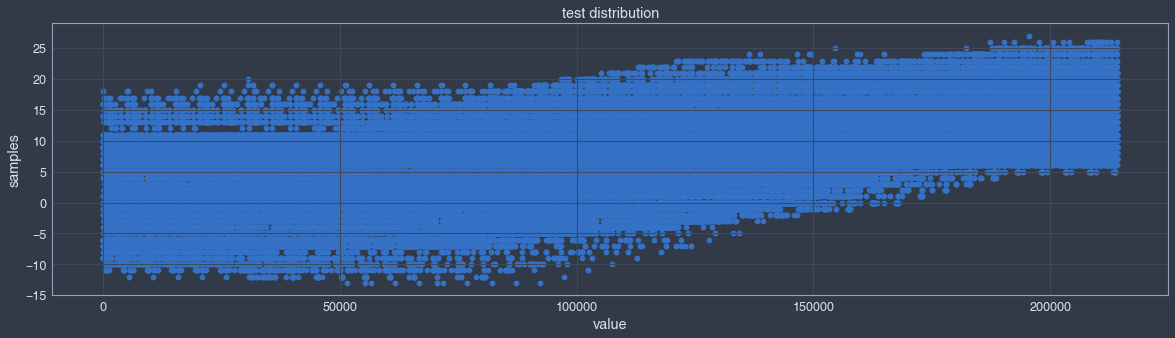

In [631]:
plt.figure(figsize=(20,5))
plt.scatter(submission.index, submission.iloc[:,-1])
plt.title('test distribution')
plt.xlabel('value')
plt.ylabel('samples')

In [ ]:
#copy-paste this link to anaconda to submit using kaggle api
#kaggle competitions submit -c competitive-data-science-predict-future-sales -f submission.csv -m "Message"